### Excercise 1b   
Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE.   
It should take in parameters of X_train, X_test, y_train, y_test, model.   
Now create a linear regression model using scikit-learns LinearRegression() (OLS normal equation with SVD) and call your function to get metrics.

In [ ]:
import pandas as pd
import numpy as np

def fit_model(model, X_train, y_train):
    """Tränar modellen på träningsdatan och returnerar samma (nu tränade) modell"""
    y_train = np.asarray(y_train).ravel()
    model.fit(X_train, y_train)
    return model


def predict_with(model, X_test):
    """
    Tar en tränad modell och X_test, returnerar prediktioner som 1D-array.
    """
    y_pred = model.predict(X_test)
    return np.asarray(y_pred).ravel()



In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = {
    "years_experience": [1,2,3,4,5,6,7,8,9,10],
    "salary": [25000,27000,30000,31500,34000,36000,39000,41000,44000,47000]
}
df = pd.DataFrame(data)

X = df[["years_experience"]]  # 2D
y = df["salary"]              # 1D



In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# förväntat ungefär: (7, 1) (3, 1) (7,) (3,)

(6, 1) (4, 1) (6,) (4,)


In [25]:
def predict_with(model, X_test):
    y_pred = model.predict(X_test)
    return np.asarray(y_pred).ravel()

model = LinearRegression()
model = fit_model(model, X_train, y_train)  # tränar
y_pred = predict_with(model, X_test)        # prediktioner

print("y_pred:", y_pred)
print("coef (k):", model.coef_.ravel())
print("intercept (m):", model.intercept_)

y_pred: [43990.43062201 26925.83732057 36677.03349282 24488.03827751]
coef (k): [2437.79904306]
intercept (m): 22050.239234449764


In [26]:
def residuals(y_true, y_pred):
    """Beräkna fel per observation: verkligt - prediktion."""
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return y_true - y_pred


res = residuals(y_test, y_pred)
print("residualer:", res)

residualer: [   9.56937799   74.16267943 -677.03349282  511.96172249]


In [27]:
def mae(res):
    """Mean Absolute Error."""
    return np.mean(np.abs(res))

def mse(res):
    """Mean Squared Error."""
    return np.mean(res**2)

def rmse(res):
    """Root Mean Squared Error."""
    return np.sqrt(mse(res))

In [28]:
res = residuals(y_test, y_pred)
print("Medel residual:", np.mean(res))
print("MAE:", mae(res))
print("MSE:", mse(res))
print("RMSE:", rmse(res))
print("Max |fel|:", np.max(np.abs(res)))

Medel residual: -20.33492822966946
MAE: 318.1818181818162
MSE: 181517.7079279326
RMSE: 426.04895015471243
Max |fel|: 677.0334928229713


In [29]:
def compute_metrics(y_true, y_pred):
    res = residuals(y_true, y_pred)
    return {
        "mean_residual": float(np.mean(res)),
        "MAE": float(mae(res)),
        "MSE": float(mse(res)),
        "RMSE": float(rmse(res)),
        "max_abs_error": float(np.max(np.abs(res))),
    }

In [30]:
metrics = compute_metrics(y_test, y_pred)
for k, v in metrics.items():
    print(f"{k}: {v:.3f}")

mean_residual: -20.335
MAE: 318.182
MSE: 181517.708
RMSE: 426.049
max_abs_error: 677.033


In [31]:
def evaluate_regression(X_train, X_test, y_train, y_test, model):
    """
    Tränar modellen, gör prediktioner på X_test, och returnerar MAE/MSE/RMSE.
    Förutsätter att hjälpfunktionerna finns: fit_model, predict_with, residuals, mae, mse, rmse.
    """
    # 1) träna
    model = fit_model(model, X_train, y_train)
    # 2) predicera
    y_pred = predict_with(model, X_test)
    # 3) residualer -> metrics
    res = residuals(y_test, y_pred)
    return {
        "MAE": float(mae(res)),
        "MSE": float(mse(res)),
        "RMSE": float(rmse(res)),
    }

In [32]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
metrics = evaluate_regression(X_train, X_test, y_train, y_test, linreg)
print(metrics)

{'MAE': 318.1818181818162, 'MSE': 181517.7079279326, 'RMSE': 426.04895015471243}


In [33]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()  # fit_intercept=True som standard

In [34]:
metrics = evaluate_regression(X_train, X_test, y_train, y_test, linreg)
for k, v in metrics.items():
    print(f"{k}: {v:.3f}")

MAE: 318.182
MSE: 181517.708
RMSE: 426.049


In [35]:
print("koefficient(er):", linreg.coef_.ravel())
print("intercept:", linreg.intercept_)

koefficient(er): [2437.79904306]
intercept: 22050.239234449764


In [36]:
import numpy as np

def make_regression_line(model, x_min, x_max, n_points=100):
    """Skapar x- och y-värden för att rita modellens raka linje."""
    x_line = np.linspace(x_min, x_max, n_points)      # jämnt utspridda x
    x_line_2d = x_line.reshape(-1, 1)                  # (n,1) för sklearn
    y_line = model.predict(x_line_2d)                  # modellens linje
    return x_line, y_line


In [37]:
x_min = float(X["years_experience"].min())
x_max = float(X["years_experience"].max())

x_line, y_line = make_regression_line(model, x_min, x_max)


c:\Users\susan\KodPython\ai_engineering_susanne_wenblad\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


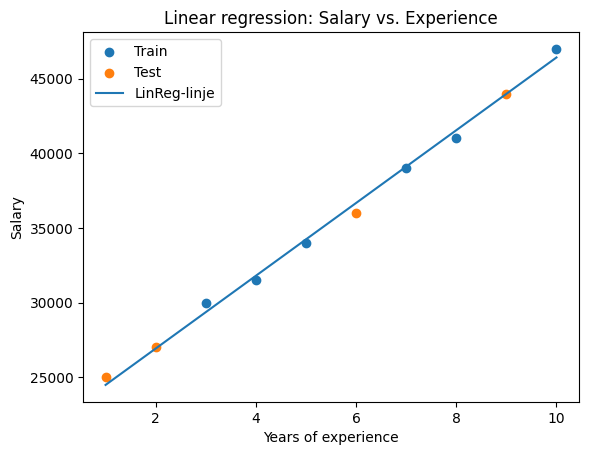

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train["years_experience"], y_train, label="Train")
plt.scatter(X_test["years_experience"],  y_test,  label="Test")
plt.plot(x_line, y_line, label="LinReg-linje")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Linear regression: Salary vs. Experience")
plt.legend()
plt.show()
